<a href="https://colab.research.google.com/github/gcasado0/ciencia_datos/blob/master/U2_ej3_ej4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio N°3 Escriba una función para realizar una interpolación lineal por tramos para los datos de la tabla de abajo. La función deberá recibir como input el valor de x y producir, como output el valor de y correspondiente:

A) Interpolacion lineal usando scipy

x = 1.0, y interpolado = 2.0
x = 1.5, y interpolado = 2.5
x = 2.0, y interpolado = 3.0
x = 2.5, y interpolado = 4.0
x = 3.0, y interpolado = 5.0
x = 3.5, y interpolado = 5.071428571428571
x = 4.0, y interpolado = 5.142857142857143
x = 4.5, y interpolado = 5.214285714285714
x = 5.0, y interpolado = 5.285714285714286
x = 5.5, y interpolado = 5.357142857142857
x = 6.0, y interpolado = 5.428571428571429
x = 6.5, y interpolado = 5.5
x = 7.0, y interpolado = 5.571428571428571
x = 7.5, y interpolado = 5.642857142857142
x = 8.0, y interpolado = 5.714285714285714
x = 8.5, y interpolado = 5.785714285714286
x = 9.0, y interpolado = 5.857142857142857
x = 9.5, y interpolado = 5.928571428571429


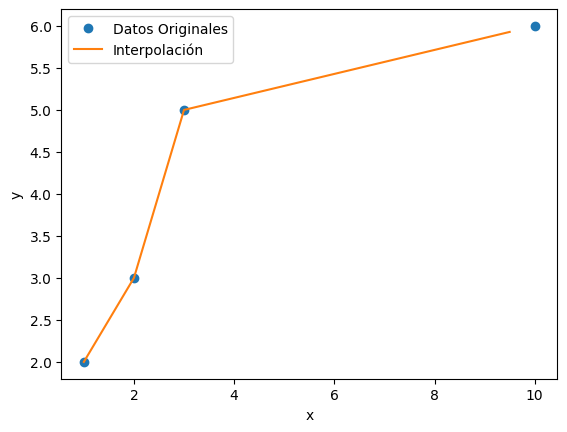

In [5]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Ejemplo de datos
data = pd.DataFrame({
    'x': [1, 2, 3, 10],   # Valores de x conocidos
    'y': [2, 3, 5, 6]  # Valores de y conocidos
})

# Crear el objeto de interpolación usando interp1d
# kind='linear' es para interpolación lineal, puedes cambiarlo por 'cubic' u otros métodos si lo deseas.
f = interp1d(data['x'], data['y'], kind='linear')

# Supongamos que quieres interpolar valores en puntos adicionales de x
x_nuevos = np.arange(1, 10, 0.5)  # Generar valores de x en un rango más detallado

# Aplicar la función de interpolación para obtener los valores y interpolados
y_interpolados = f(x_nuevos)

# Mostrar los valores interpolados
for x_val, y_val in zip(x_nuevos, y_interpolados):
    print(f"x = {x_val}, y interpolado = {y_val}")

# Opcional: Graficar los datos originales y los interpolados
plt.plot(data['x'], data['y'], 'o', label="Datos Originales")
plt.plot(x_nuevos, y_interpolados, '-', label="Interpolación")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


B) Interpolacion lineal usando pandas

        y  y_interpolado
x                       
1.0   2.0       2.000000
1.5   NaN       2.500000
2.0   3.0       3.000000
2.5   NaN       4.000000
3.0   5.0       5.000000
5.0   NaN       5.333333
7.0   NaN       5.666667
10.0  6.0       6.000000


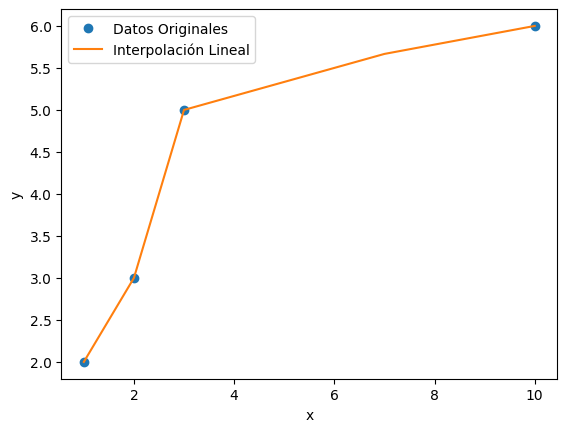

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de datos
data = pd.DataFrame({
    'x': [1, 1.5, 2, 2.5, 3, 5, 7, 10],   # Valores de x conocidos
    'y': [2, np.nan, 3, np.nan, 5, np.nan, np.nan, 6]  # Valores de y conocidos
})

# Establecer la columna 'x' como índice, si quieres que pandas use esos valores en la interpolación
data.set_index('x', inplace=True)

# Interpolar los valores faltantes en la columna 'y' (usando la interpolación lineal por defecto)
data['y_interpolado'] = data['y'].interpolate(method='linear')

# Mostrar el DataFrame con la columna interpolada
print(data)

# Graficar para visualizar la interpolación
plt.plot(data.index, data['y'], 'o', label="Datos Originales")
plt.plot(data.index, data['y_interpolado'], '-', label="Interpolación Lineal")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Ambos metodos son diferentes como se puede ver:
A)

x = 5.0, y interpolado = 5.285714285714286

x = 7.0, y interpolado = 5.571428571428571

B)

5.0   NaN       5.333333

7.0   NaN       5.666667





C) Intepolacion lineal funcion propia

In [71]:
def interpolar(data, x_val, columna_x='x', columna_y='y'):
  # Interpolacion lineal
  # renombrar la columna por 'x'
  data.rename(columns={ columna_x: 'x', columna_y: 'y' }, inplace=True)
  data.dropna(inplace=True)
  print(data)

  # Ordenar la columna 'x' si no está ordenada (siempre es buena práctica)
  data = data.sort_values(by='x').reset_index(drop=True)

  # Encontrar el índice del valor menor más cercano a x_val
  indice_inferior = data[data['x'] <= x_val]['x'].idxmax()

  # Encontrar el índice del valor mayor más cercano a x_val
  indice_superior = data[data['x'] >= x_val]['x'].idxmin()

  # Obtener la fila completa con el valor de 'x' más cercano
  x0 = data.loc[indice_inferior]
  print(f"punto_inferior: ({x0.x},{x0.y})")
  x1 = data.loc[indice_superior]
  print(f"punto_inferior: ({x1.x},{x1.y})")

  pendiente = (x1.y - x0.y)/(x1.x-x0.x)
  print(f"pendiente: {pendiente}")
  y = x0.y + pendiente * (x_val -x0.x)
  return y

In [69]:
tabla = pd.DataFrame({
      'x': [1, 2, 3, 10],  # Valores de x conocidos
      'y': [2, 3, 5, 6]  # Valores de y conocidos
  })


x = 1.5
print(f"x={x} -> y={interpolar(tabla, x)}")
x = 5
print(f"x={x} -> y={interpolar(tabla, x)}")
x = 7
print(f"x={x} -> y={interpolar(tabla, x)}")

    x  y
0   1  2
1   2  3
2   3  5
3  10  6
punto_inferior: (1,2)
punto_inferior: (2,3)
pendiente: 1.0
x=1.5 -> y=2.5
    x  y
0   1  2
1   2  3
2   3  5
3  10  6
punto_inferior: (3,5)
punto_inferior: (10,6)
pendiente: 0.14285714285714285
x=5 -> y=5.285714285714286
    x  y
0   1  2
1   2  3
2   3  5
3  10  6
punto_inferior: (3,5)
punto_inferior: (10,6)
pendiente: 0.14285714285714285
x=7 -> y=5.571428571428571


In [51]:
print(data)

print(data[data['x'] <= 2.5]['x'])

print(data[data['x'] >= 2.5]['x'])

    x  y
0   1  2
1   2  3
2   3  5
3  10  6
0    1
1    2
Name: x, dtype: int64
2     3
3    10
Name: x, dtype: int64


Ejercicio N°4
La siguiente tabla resume la evolución de la población total argentina desde 1960 a la actualidad según los censos nacionales de población (fuente: INDEC):


```
Año Población total
1960 20013793
1970 23364431
1978
1980 27949780
1986
1991 32615528
2001 36260130
2010 40117096
2014
2022 46044703
```

Utilizando una interpolación lineal, complete la información sobre Población total para aquellos
años en los que no se cuenta con datos de censos nacionales.

In [88]:
tabla_poblacion = pd.DataFrame({'anio': [1960, 1970, 1978, 1980, 1986, 1991, 2001, 2010, 2014, 2022],
                                'poblacion':  [20013793, 23364431, None, 27949780, None, 32615528, 36260130, 40117096, None, 46044703]})
tabla_poblacion

,anio,poblacion
0,1960,20013793.0
1,1970,23364431.0
2,1978,NaN
3,1980,27949780.0
4,1986,NaN
5,1991,32615528.0
6,2001,36260130.0
7,2010,40117096.0
8,2014,NaN
9,2022,46044703.0


In [82]:
tabla_poblacion1 = tabla_poblacion.copy()
x = 1978
print(f"x={x} -> y={interpolar(tabla_poblacion1, x, 'anio', 'poblacion' )}")
x = 1986
print(f"x={x} -> y={interpolar(tabla_poblacion1, x, 'anio', 'poblacion' )}")
x = 2014
print(f"x={x} -> y={interpolar(tabla_poblacion1, x, 'anio', 'poblacion' )}")

      x           y
0  1960  20013793.0
1  1970  23364431.0
3  1980  27949780.0
5  1991  32615528.0
6  2001  36260130.0
7  2010  40117096.0
9  2022  46044703.0
punto_inferior: (1970.0,23364431.0)
punto_inferior: (1980.0,27949780.0)
pendiente: 458534.9
x=1978 -> y=27032710.2
      x           y
0  1960  20013793.0
1  1970  23364431.0
3  1980  27949780.0
5  1991  32615528.0
6  2001  36260130.0
7  2010  40117096.0
9  2022  46044703.0
punto_inferior: (1980.0,27949780.0)
punto_inferior: (1991.0,32615528.0)
pendiente: 424158.9090909091
x=1986 -> y=30494733.454545453
      x           y
0  1960  20013793.0
1  1970  23364431.0
3  1980  27949780.0
5  1991  32615528.0
6  2001  36260130.0
7  2010  40117096.0
9  2022  46044703.0
punto_inferior: (2010.0,40117096.0)
punto_inferior: (2022.0,46044703.0)
pendiente: 493967.25
x=2014 -> y=42092965.0


In [89]:
tabla_poblacion

,anio,poblacion
0,1960,20013793.0
1,1970,23364431.0
2,1978,NaN
3,1980,27949780.0
4,1986,NaN
5,1991,32615528.0
6,2001,36260130.0
7,2010,40117096.0
8,2014,NaN
9,2022,46044703.0


In [90]:
# Establecer la columna 'x' como índice, si quieres que pandas use esos valores en la interpolación
tabla_poblacion.set_index('anio', inplace=True)
print(tabla_poblacion)


       poblacion
anio            
1960  20013793.0
1970  23364431.0
1978         NaN
1980  27949780.0
1986         NaN
1991  32615528.0
2001  36260130.0
2010  40117096.0
2014         NaN
2022  46044703.0


In [91]:
# Interpolar los valores faltantes en la columna 'y' (usando la interpolación lineal por defecto)
tabla_poblacion['interpolado'] = tabla_poblacion['poblacion'].interpolate(method='linear')

# Mostrar el DataFrame con la columna interpolada
print(tabla_poblacion)

       poblacion  interpolado
anio                         
1960  20013793.0   20013793.0
1970  23364431.0   23364431.0
1978         NaN   25657105.5
1980  27949780.0   27949780.0
1986         NaN   30282654.0
1991  32615528.0   32615528.0
2001  36260130.0   36260130.0
2010  40117096.0   40117096.0
2014         NaN   43080899.5
2022  46044703.0   46044703.0
